In [1]:
import pandas as pd
import numpy as np

In [2]:
# 시각화
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)        #항상 복붙해서 사용, 의미만 파악


# 서울특별시_전월세가_2022 데이터 전처리

In [3]:
sel_propert = pd.read_csv('data/서울특별시_전월세가_2022.csv', encoding='euc-kr')
sel_propert.head()

,접수년도,자치구코드,자치구명,법정동코드,법정동명,지번구분코드,지번구분,본번,부번,층,...,보증금(만원),임대료(만원),건물명,건축년도,건물용도,계약기간,신규계약구분,갱신청구권사용,종전보증금,종전임대료
0,2022,11560,영등포구,12600,양평동2가,1.0,대지,1.0,3.0,6.0,...,16000,0,힘멜하임,2014.0,오피스텔,22.01~24.01,신규,NaN,0.0,NaN
1,2022,11560,영등포구,11800,도림동,NaN,NaN,NaN,NaN,NaN,...,300,30,NaN,1986.0,단독다가구,NaN,NaN,NaN,NaN,NaN
2,2022,11215,광진구,10700,화양동,1.0,대지,111.0,12.0,19.0,...,10000,135,NaN,2021.0,오피스텔,22.01~24.01,신규,NaN,0.0,0.0
3,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,4000,40,NaN,2019.0,단독다가구,22.02~23.02,신규,NaN,0.0,0.0
4,2022,11620,관악구,10100,봉천동,NaN,NaN,NaN,NaN,NaN,...,13000,0,NaN,2019.0,단독다가구,22.01~24.01,신규,NaN,0.0,NaN


In [4]:
sel_propert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560665 entries, 0 to 560664
Data columns (total 23 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   접수년도     560665 non-null  int64  
 1   자치구코드    560665 non-null  int64  
 2   자치구명     560665 non-null  object 
 3   법정동코드    560665 non-null  int64  
 4   법정동명     560665 non-null  object 
 5   지번구분코드   402721 non-null  float64
 6   지번구분     402721 non-null  object 
 7   본번       402938 non-null  float64
 8   부번       402938 non-null  float64
 9   층        402766 non-null  float64
 10  계약일      560665 non-null  int64  
 11  전월세구분    560665 non-null  object 
 12  임대면적     560665 non-null  float64
 13  보증금(만원)  560665 non-null  int64  
 14  임대료(만원)  560665 non-null  int64  
 15  건물명      402905 non-null  object 
 16  건축년도     551568 non-null  float64
 17  건물용도     560665 non-null  object 
 18  계약기간     409472 non-null  object 
 19  신규계약구분   419152 non-null  object 
 20  갱신청구권사용  71376 non-null   

In [5]:
# 필요없는 colums 삭제, 수정하기 편하게 변수를 list로 지정
col = ['지번구분코드', '지번구분', '본번', '부번', '종전임대료', '종전보증금', '건물명', '신규계약구분', '갱신청구권사용', '층', '계약기간', '건축년도']
sel_propert = sel_propert.drop(columns=col)
sel_propert.head()

,접수년도,자치구코드,자치구명,법정동코드,법정동명,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물용도
0,2022,11560,영등포구,12600,양평동2가,20220101,전세,18.84,16000,0,오피스텔
1,2022,11560,영등포구,11800,도림동,20220101,월세,20.00,300,30,단독다가구
2,2022,11215,광진구,10700,화양동,20220101,월세,27.82,10000,135,오피스텔
3,2022,11620,관악구,10100,봉천동,20220101,월세,18.50,4000,40,단독다가구
4,2022,11620,관악구,10100,봉천동,20220101,전세,14.00,13000,0,단독다가구


In [6]:
#'법정동코드' 통일을 위해 '자치구코드' + '법정동코드'
sel_propert['법정동코드'] = sel_propert['법정동코드'].astype('str')
sel_propert['자치구코드'] = sel_propert['자치구코드'].astype('str')

sel_propert['법정동코드'] = sel_propert['자치구코드'] + sel_propert['법정동코드']

try:
    sel_propert['법정동코드'] = sel_propert['법정동코드'].astype('int')
    sel_propert['자치구코드'] = sel_propert['자치구코드'].astype('int')
except:
    sel_propert['법정동코드'] = sel_propert['법정동코드'].astype('float')
    sel_propert['자치구코드'] = sel_propert['자치구코드'].astype('float')

sel_propert

,접수년도,자치구코드,자치구명,법정동코드,법정동명,계약일,전월세구분,임대면적,보증금(만원),임대료(만원),건물용도
0,2022,11560,영등포구,1156012600,양평동2가,20220101,전세,18.84,16000,0,오피스텔
1,2022,11560,영등포구,1156011800,도림동,20220101,월세,20.00,300,30,단독다가구
2,2022,11215,광진구,1121510700,화양동,20220101,월세,27.82,10000,135,오피스텔
3,2022,11620,관악구,1162010100,봉천동,20220101,월세,18.50,4000,40,단독다가구
4,2022,11620,관악구,1162010100,봉천동,20220101,전세,14.00,13000,0,단독다가구
...,...,...,...,...,...,...,...,...,...,...,...
560660,2022,11230,동대문구,1123010200,용두동,20221231,월세,43.00,17000,25,단독다가구
560661,2023,11560,영등포구,1156013200,신길동,20221231,월세,37.00,1000,33,단독다가구
560662,2023,11530,구로구,1153010700,개봉동,20221231,전세,37.00,8500,0,단독다가구
560663,2023,11290,성북구,1129013300,정릉동,20221231,월세,63.57,5000,60,단독다가구


In [7]:
# '계약일'을 datatime으로 변환 후 '계약년도', '계약분기' 라는 새로운 열 추가
sel_propert['계약일'] = sel_propert['계약일'].astype('str')
sel_propert['계약일'] = pd.to_datetime(sel_propert['계약일'])
sel_propert['계약년도'] = sel_propert['계약일'].dt.year
sel_propert['계약분기'] = sel_propert['계약일'].dt.quarter
sel_propert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560665 entries, 0 to 560664
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   접수년도     560665 non-null  int64         
 1   자치구코드    560665 non-null  int32         
 2   자치구명     560665 non-null  object        
 3   법정동코드    560665 non-null  int32         
 4   법정동명     560665 non-null  object        
 5   계약일      560665 non-null  datetime64[ns]
 6   전월세구분    560665 non-null  object        
 7   임대면적     560665 non-null  float64       
 8   보증금(만원)  560665 non-null  int64         
 9   임대료(만원)  560665 non-null  int64         
 10  건물용도     560665 non-null  object        
 11  계약년도     560665 non-null  int64         
 12  계약분기     560665 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(5), object(4)
memory usage: 51.3+ MB


In [8]:
# 평단위에 익숙한 사람들을 위해 '임대면적(평수)' columns 추가
sel_propert.insert(8,'임대면적(평수)', (sel_propert['임대면적']/3.31).round())
sel_propert.head()

,접수년도,자치구코드,자치구명,법정동코드,법정동명,계약일,전월세구분,임대면적,임대면적(평수),보증금(만원),임대료(만원),건물용도,계약년도,계약분기
0,2022,11560,영등포구,1156012600,양평동2가,2022-01-01,전세,18.84,6.0,16000,0,오피스텔,2022,1
1,2022,11560,영등포구,1156011800,도림동,2022-01-01,월세,20.00,6.0,300,30,단독다가구,2022,1
2,2022,11215,광진구,1121510700,화양동,2022-01-01,월세,27.82,8.0,10000,135,오피스텔,2022,1
3,2022,11620,관악구,1162010100,봉천동,2022-01-01,월세,18.50,6.0,4000,40,단독다가구,2022,1
4,2022,11620,관악구,1162010100,봉천동,2022-01-01,전세,14.00,4.0,13000,0,단독다가구,2022,1


In [9]:
sel_propert['건물용도'].value_counts()

아파트      219948
단독다가구    157899
연립다세대    121202
오피스텔      61616
Name: 건물용도, dtype: int64

In [10]:
sel_propert['건물용도'] = np.where((sel_propert['건물용도'] != '오피스텔') & (sel_propert['건물용도'] != '단독다가구'), np.nan, sel_propert['건물용도'])
sel_propert.dropna(subset=['건물용도'], inplace=True)

In [11]:
sel_propert['건물용도'].value_counts()

단독다가구    157899
오피스텔      61616
Name: 건물용도, dtype: int64

In [12]:
sel_propert = sel_propert[(sel_propert['건물용도'] != '단독다가구') | (sel_propert['임대면적(평수)'] == 8)]
sel_propert = sel_propert[(sel_propert['건물용도'] != '오피스텔') | (sel_propert['임대면적(평수)'] == 11)]

sel_propert.dropna(subset=['임대면적(평수)'], inplace=True)

sel_propert =sel_propert.reset_index(drop=True)
sel_propert

,접수년도,자치구코드,자치구명,법정동코드,법정동명,계약일,전월세구분,임대면적,임대면적(평수),보증금(만원),임대료(만원),건물용도,계약년도,계약분기
0,2022,11560,영등포구,1156012600,양평동2가,2022-01-01,월세,37.61,11.0,3000,80,오피스텔,2022,1
1,2022,11680,강남구,1168010100,역삼동,2022-01-01,월세,25.74,8.0,1000,48,단독다가구,2022,1
2,2022,11590,동작구,1159010200,상도동,2022-01-01,월세,28.00,8.0,1000,35,단독다가구,2022,1
3,2022,11620,관악구,1162010200,신림동,2022-01-01,월세,28.00,8.0,1000,20,단독다가구,2022,1
4,2022,11380,은평구,1138010300,불광동,2022-01-01,월세,28.00,8.0,1000,55,단독다가구,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12661,2023,11260,중랑구,1126010500,망우동,2022-12-31,월세,28.00,8.0,300,25,단독다가구,2022,4
12662,2023,11380,은평구,1138010400,갈현동,2022-12-31,전세,26.00,8.0,13000,0,단독다가구,2022,4
12663,2023,11140,중구,1114016200,신당동,2022-12-31,월세,27.00,8.0,5000,35,단독다가구,2022,4
12664,2023,11200,성동구,1120010200,하왕십리동,2022-12-31,월세,27.00,8.0,3000,50,단독다가구,2022,4


In [13]:
sel_propert['자치구명'].value_counts()

관악구     1163
광진구      859
강남구      807
영등포구     743
마포구      706
동작구      681
중랑구      666
송파구      594
강동구      584
동대문구     569
서초구      565
구로구      466
강서구      462
성동구      434
금천구      433
성북구      422
서대문구     410
강북구      320
용산구      317
중구       316
은평구      275
양천구      272
종로구      252
노원구      188
도봉구      162
Name: 자치구명, dtype: int64

In [14]:
col_name = [ '성북구', '용산구', '강북구', '서대문구', '성동구', '도봉구', '중구', '남대문구']
sel_propert.loc[~sel_propert['자치구명'].isin(col_name), '자치구명'] = pd.NA



sel_propert.dropna(subset=['자치구명'], inplace=True)

sel_propert =sel_propert.reset_index(drop=True)
sel_propert


,접수년도,자치구코드,자치구명,법정동코드,법정동명,계약일,전월세구분,임대면적,임대면적(평수),보증금(만원),임대료(만원),건물용도,계약년도,계약분기
0,2022,11290,성북구,1129013300,정릉동,2022-01-02,월세,25.54,8.0,1000,50,단독다가구,2022,1
1,2022,11170,용산구,1117010400,갈월동,2022-01-03,월세,25.00,8.0,500,50,단독다가구,2022,1
2,2022,11410,서대문구,1141011000,북아현동,2022-01-03,월세,25.00,8.0,1000,52,단독다가구,2022,1
3,2022,11140,중구,1114016200,신당동,2022-01-03,월세,25.00,8.0,1000,60,단독다가구,2022,1
4,2022,11410,서대문구,1141010200,충정로3가,2022-01-03,월세,26.45,8.0,2000,50,단독다가구,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2022,11170,용산구,1117011000,청파동2가,2022-12-30,월세,28.00,8.0,1000,50,단독다가구,2022,4
2377,2023,11170,용산구,1117013000,이태원동,2022-12-31,월세,25.59,8.0,12000,20,단독다가구,2022,4
2378,2023,11410,서대문구,1141011700,연희동,2022-12-31,월세,26.40,8.0,2000,60,단독다가구,2022,4
2379,2023,11140,중구,1114016200,신당동,2022-12-31,월세,27.00,8.0,5000,35,단독다가구,2022,4


In [15]:
group_propert = sel_propert.groupby(['전월세구분','건물용도','법정동명'])[['보증금(만원)', '임대료(만원)']].mean().round()
group_propert

보증금(만원)  임대료(만원)
전월세구분 건물용도  법정동명                   
월세    단독다가구 갈월동     1044.0     49.0
            광희동2가    800.0     62.0
            금호동2가   2000.0     40.0
            금호동3가   3433.0     32.0
            금호동4가   3000.0     31.0
...                    ...      ...
전세    오피스텔  한강로2가  27140.0      0.0
            합동     23000.0      0.0
            행당동    30308.0      0.0
            황학동    31678.0      2.0
            흥인동    25000.0      0.0

[249 rows x 2 columns]

In [16]:
filtered_propert1 = group_propert.loc['월세','단독다가구'].reset_index()
filtered_propert2 = group_propert.loc['전세','단독다가구'].reset_index()
filtered_propert3 = group_propert.loc['월세','오피스텔'].reset_index()
filtered_propert4 = group_propert.loc['전세','오피스텔'].reset_index()

In [17]:
# 단독다가구 월세 가격순
filtered_propert1.sort_values(('임대료(만원)'), ascending=False, inplace=True)
filtered_propert1_1 = filtered_propert1.iloc[::-1]
filtered_propert1_1

,법정동명,보증금(만원),임대료(만원)
92,충정로2가,12000.0,10.0
26,무학동,3500.0,20.0
75,원효로1가,7750.0,24.0
79,장위동,1752.0,27.0
33,보문동1가,8000.0,30.0
...,...,...,...
106,회현동2가,1000.0,63.0
20,동소문동3가,3000.0,65.0
84,주성동,1000.0,65.0
98,한강로3가,5750.0,73.0


In [18]:
# 단독다가구 월세 보증금 가격순
filtered_propert1.sort_values(('보증금(만원)'), ascending=False, inplace=True)
filtered_propert1_2 = filtered_propert1.iloc[::-1]
filtered_propert1_2

,법정동명,보증금(만원),임대료(만원)
44,삼선동2가,350.0,37.0
10,도봉동,443.0,35.0
12,돈암동,450.0,45.0
94,필동2가,500.0,50.0
102,홍익동,500.0,36.0
...,...,...,...
98,한강로3가,5750.0,73.0
51,성북동,5886.0,30.0
75,원효로1가,7750.0,24.0
33,보문동1가,8000.0,30.0


In [19]:
#단독다가구 전세 가격 순
filtered_propert2.sort_values(('보증금(만원)'), ascending=False, inplace=True)
filtered_propert2_1 = filtered_propert2.iloc[::-1]
filtered_propert2_1

,법정동명,보증금(만원),임대료(만원)
68,충정로2가,2000.0,0.0
57,원효로2가,3000.0,0.0
10,도봉동,3888.0,0.0
71,하월곡동,4000.0,0.0
22,방학동,4622.0,0.0
...,...,...,...
64,천연동,15000.0,0.0
53,용문동,15225.0,0.0
67,청파동3가,16000.0,0.0
66,청파동2가,17000.0,0.0


In [20]:
# 오피스텔 월세 가격순
filtered_propert3.sort_values(('임대료(만원)'), ascending=False, inplace=True)
filtered_propert3_1 = filtered_propert3.iloc[::-1]
filtered_propert3_1

,법정동명,보증금(만원),임대료(만원)
15,원효로1가,17500.0,24.0
13,연희동,1000.0,30.0
6,번동,2236.0,34.0
1,금호동4가,11000.0,35.0
23,한강로2가,12069.0,49.0
5,미아동,500.0,50.0
7,보문동2가,2500.0,55.0
20,충무로5가,12833.0,56.0
10,성수동1가,5500.0,65.0
18,창동,1750.0,70.0


In [21]:
#오피스텔 월세 보증금 가격순
filtered_propert3.sort_values(('보증금(만원)'), ascending=False, inplace=True)
filtered_propert3_2 = filtered_propert3.iloc[::-1]
filtered_propert3_2

,법정동명,보증금(만원),임대료(만원)
5,미아동,500.0,50.0
14,용답동,933.0,72.0
25,합동,1000.0,86.0
13,연희동,1000.0,30.0
2,대현동,1000.0,120.0
24,한남동,1000.0,110.0
19,충무로3가,1000.0,97.0
28,흥인동,1500.0,100.0
0,광희동1가,1500.0,80.0
11,수유동,1519.0,89.0


In [22]:
# 오피스텔 전세 전세순
filtered_propert4.sort_values(('보증금(만원)'), ascending=False, inplace=True)
filtered_propert4_1 = filtered_propert4.iloc[::-1]
filtered_propert4_1

,법정동명,보증금(만원),임대료(만원)
4,번동,8000.0,0.0
2,마장동,14000.0,0.0
11,연희동,14000.0,0.0
5,삼선동5가,15000.0,0.0
13,용답동,16600.0,0.0
8,수유동,16929.0,0.0
22,충정로2가,22000.0,0.0
18,창동,22025.0,0.0
6,성수동1가,22033.0,0.0
25,합동,23000.0,0.0


# 전/월세 시각화

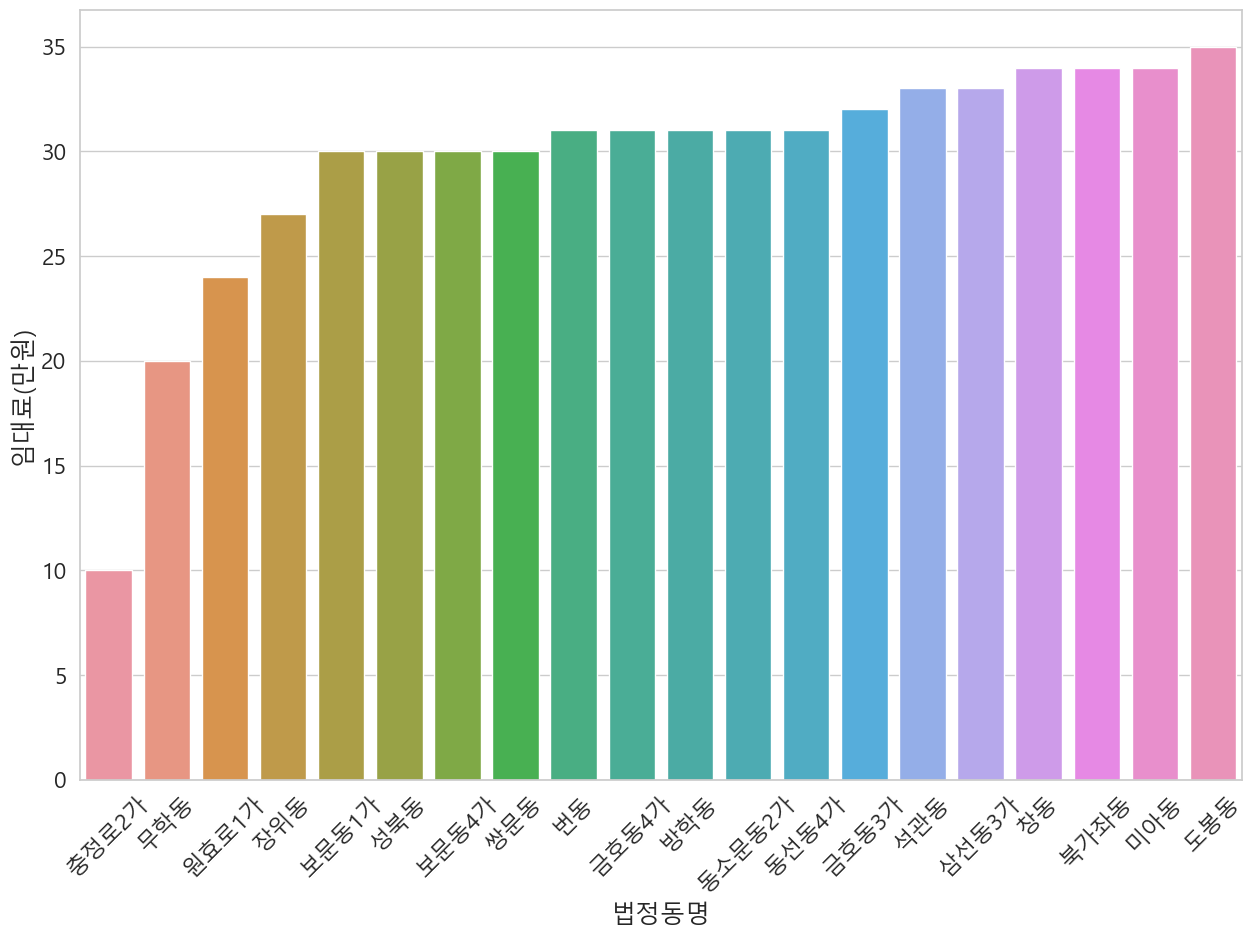

In [49]:
# 단독다가구 월세 시각화
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.barplot(x='법정동명', y='임대료(만원)', data=filtered_propert1_1.head(20));

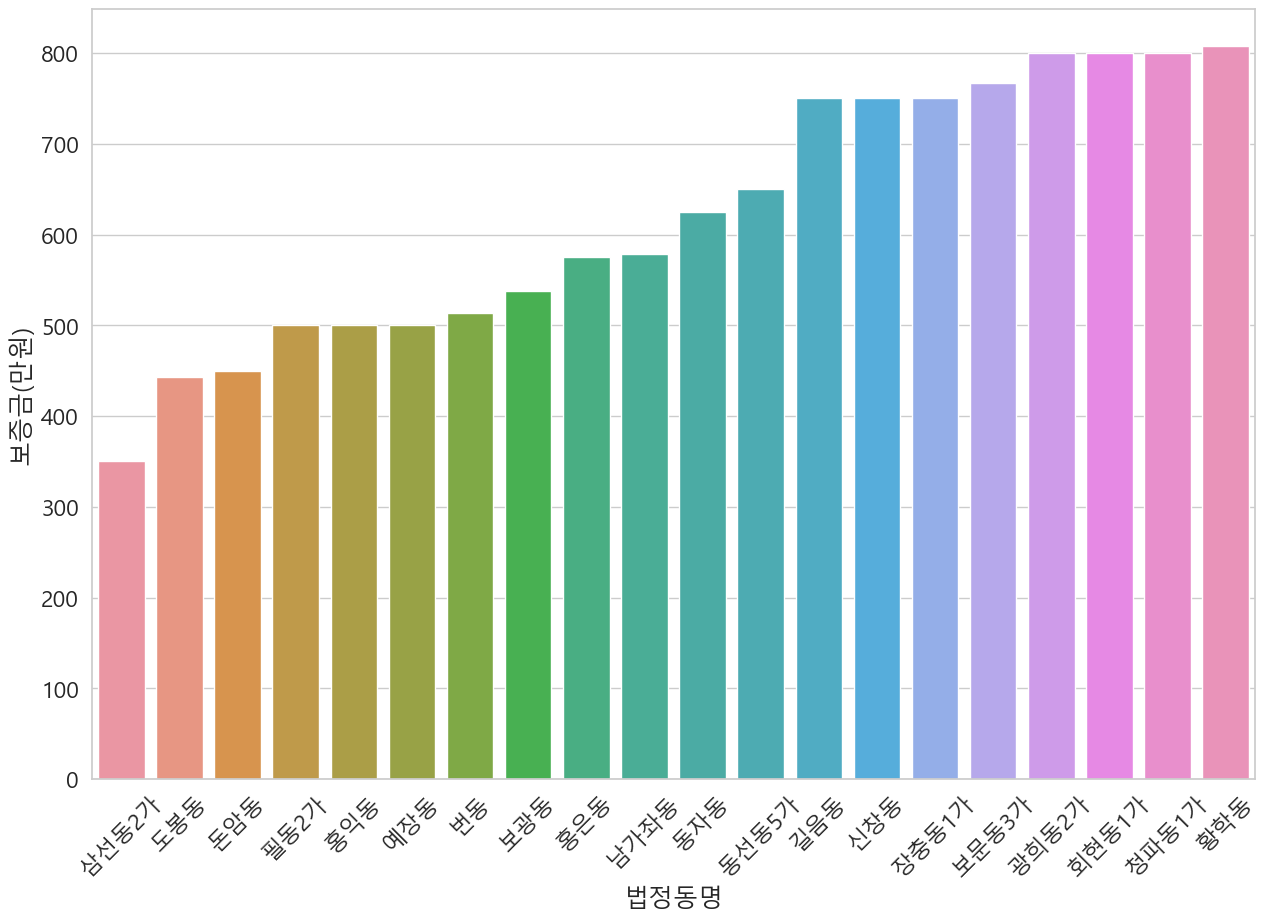

In [51]:
# 단독다가구 월세 보증금 시각화
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.barplot(x='법정동명', y='보증금(만원)', data=filtered_propert1_2.head(20));

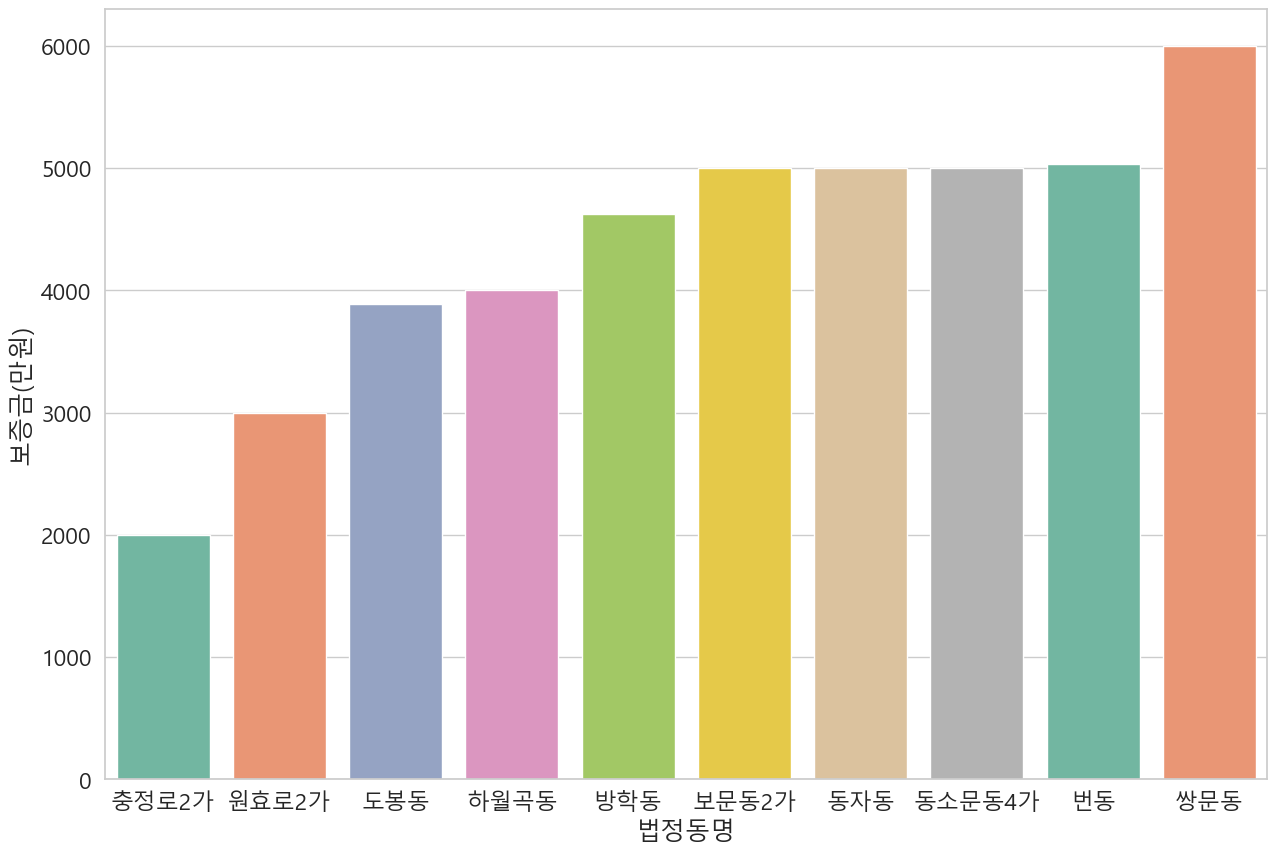

In [25]:
# 단독다가구 전세 시각화
plt.figure(figsize=(15,10))
sns.barplot(x='법정동명', y='보증금(만원)', data=filtered_propert2_1.head(10));

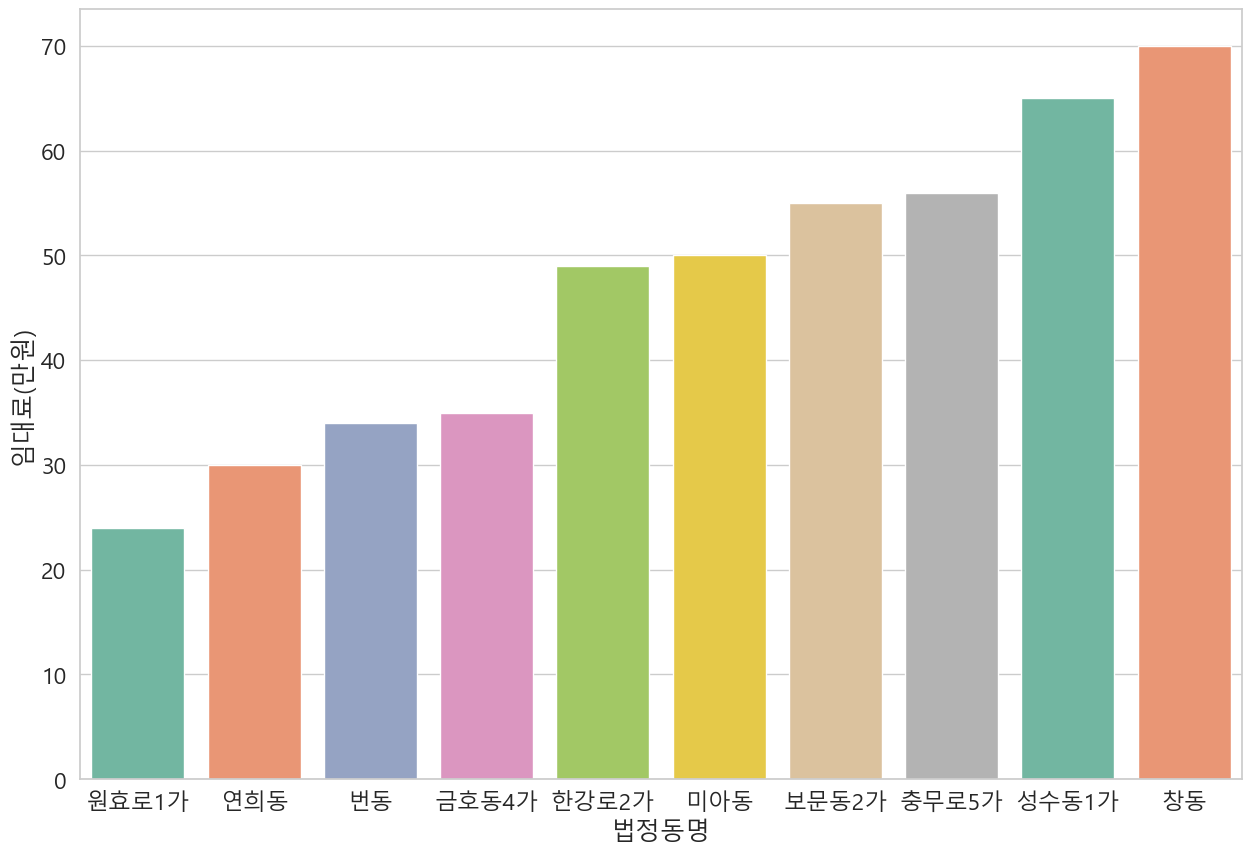

In [26]:
# 오피스텔 월세 시각화
plt.figure(figsize=(15,10))
sns.barplot(x='법정동명', y='임대료(만원)', data=filtered_propert3_1.head(10));

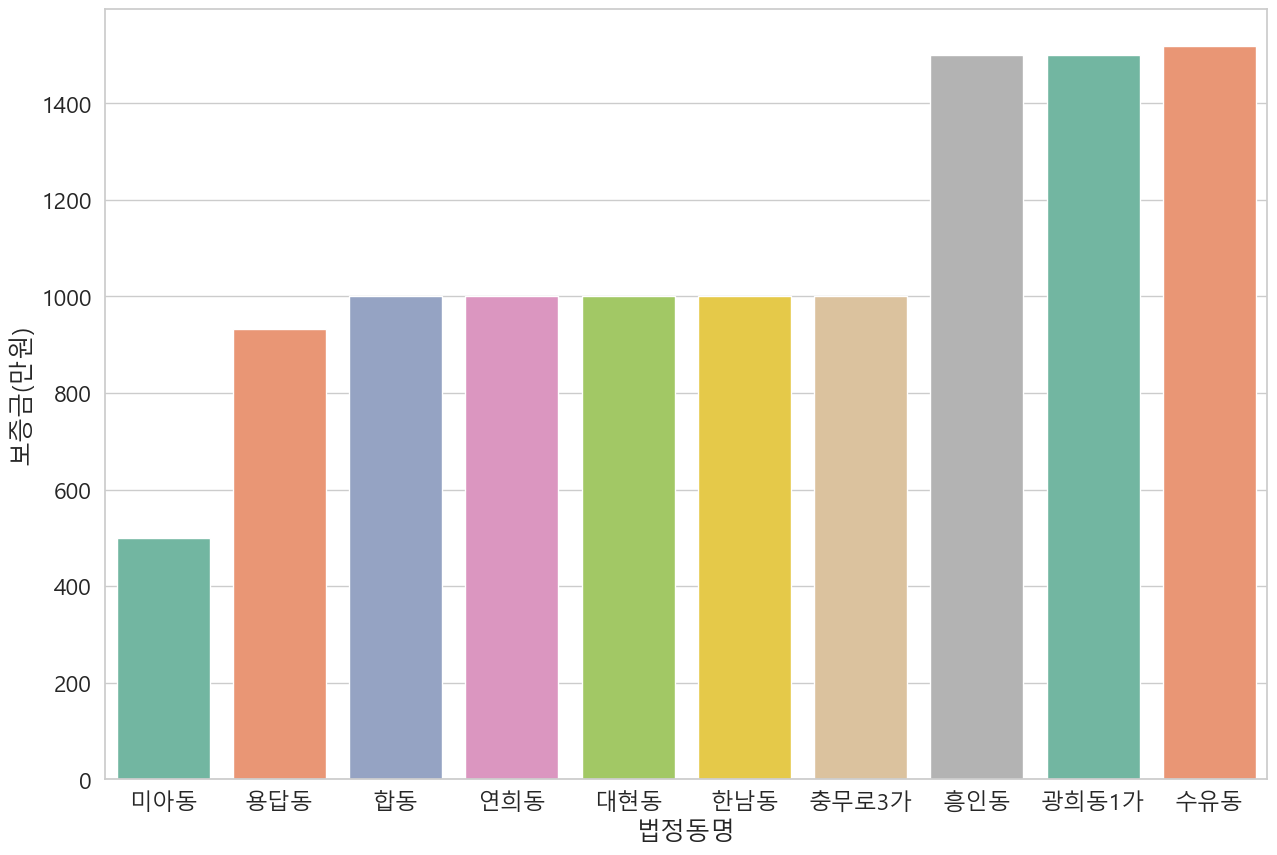

In [28]:
# 오피스텔 월세 시각화
plt.figure(figsize=(15,10))
sns.barplot(x='법정동명', y='보증금(만원)', data=filtered_propert3_2.head(10));

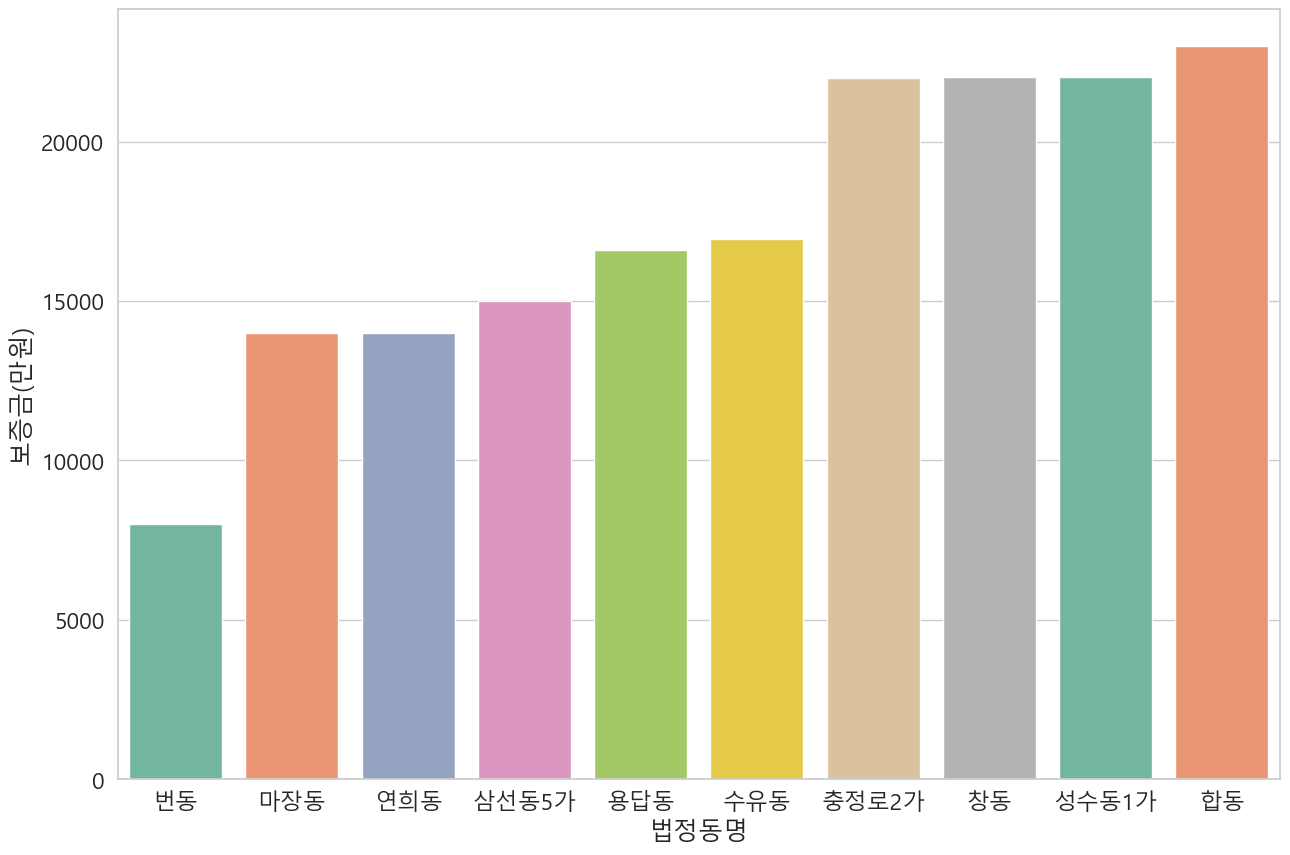

In [27]:
# 오피스텔 전세 시각화
plt.figure(figsize=(15,10))
sns.barplot(x='법정동명', y='보증금(만원)', data=filtered_propert4_1.head(10));

# 5대_범죄_발생현황_데이터

In [29]:
crime = pd.read_csv('data/경찰청_서울특별시경찰청_경찰서별_5대범죄_발생_검거_현황_20211231.csv', encoding='euc-kr')
crime

,구분,죄종,발생검거,건수,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,중부,살인,발생,4,NaN,NaN,NaN,NaN,NaN
1,중부,살인,검거,4,NaN,NaN,NaN,NaN,NaN
2,중부,강도,발생,3,NaN,NaN,NaN,NaN,NaN
3,중부,강도,검거,3,NaN,NaN,NaN,NaN,NaN
4,중부,"강간,추행",발생,109,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
305,수서,"강간,추행",검거,129,NaN,NaN,NaN,NaN,NaN
306,수서,절도,발생,855,NaN,NaN,NaN,NaN,NaN
307,수서,절도,검거,423,NaN,NaN,NaN,NaN,NaN
308,수서,폭력,발생,1198,NaN,NaN,NaN,NaN,NaN


In [30]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   구분          310 non-null    object 
 1   죄종          310 non-null    object 
 2   발생검거        310 non-null    object 
 3   건수          310 non-null    int64  
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(5), int64(1), object(3)
memory usage: 21.9+ KB


In [31]:
#필요없는 columns 제거
col1 = ['Unnamed: 4','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']
crime = crime.drop(columns=col1)
crime.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,4
1,중부,살인,검거,4
2,중부,강도,발생,3
3,중부,강도,검거,3
4,중부,"강간,추행",발생,109


In [32]:
#발생검거 중 범죄율을 분석하는데 필요없는 '검거' 결측치로 대체 후 삭제
crime['발생검거'] = crime['발생검거'].replace({'검거' : np.nan})
crime.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,4
1,중부,살인,NaN,4
2,중부,강도,발생,3
3,중부,강도,NaN,3
4,중부,"강간,추행",발생,109


In [33]:
crime['발생검거'] = crime['발생검거'].replace({'중부구' : '중구'})

In [34]:
crime.shape

(310, 4)

In [35]:
#결측치를 가진 행 삭제
crime = crime.dropna().reset_index(drop=True)
crime.shape

(155, 4)

In [36]:
crime

,구분,죄종,발생검거,건수
0,중부,살인,발생,4
1,중부,강도,발생,3
2,중부,"강간,추행",발생,109
3,중부,절도,발생,765
4,중부,폭력,발생,945
...,...,...,...,...
150,수서,살인,발생,4
151,수서,강도,발생,12
152,수서,"강간,추행",발생,150
153,수서,절도,발생,855


In [37]:
# sel_propert dataframe과 crime dataframe을 병합하기 위해 '구분'을 '자치구명'으로 통일
crime['구분'] = crime['구분'] + '구'
crime = crime.rename(columns= {'구분' : '자치구명'})
crime.head()

,자치구명,죄종,발생검거,건수
0,중부구,살인,발생,4
1,중부구,강도,발생,3
2,중부구,"강간,추행",발생,109
3,중부구,절도,발생,765
4,중부구,폭력,발생,945


In [43]:
# 경찰서 관할 구별로 재정리
col1 = {'중부구':'중구',
       '남대문구' : '중구',
       '혜화구':'종로구',
       '방배구' : '서초구',
       '서부구' : '은평구',
       '금천구' : '관악구',
       '종암구' : '성북구',
       '수서구' : '강남구'}
crime['자치구명'] = crime['자치구명'].replace(col1)


In [44]:
# pivot table생성
pivot_crime = pd.pivot_table(crime, index= '자치구명', columns='죄종', values='건수', aggfunc= 'sum', fill_value=0).reset_index()
# 행 값들의 총합 구하기
row_totals = pivot_crime.sum(axis=1)

# pivot_table에 '구별 범죄 발생률' 열 추가
pivot_crime['행 합계'] = row_totals
pivot_crime['구별 범죄 발생률'] = pivot_crime['행 합계']/pivot_crime['행 합계'].sum()
pivot_crime

C:\Users\82104\AppData\Local\Temp\ipykernel_2132\3555772711.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  row_totals = pivot_crime.sum(axis=1)


죄종,자치구명,강간,"강간,추행",강도,살인,절도,폭력,행 합계,구별 범죄 발생률
0,강남구,0,578,25,12,2372,3159,6146,0.076400
1,강동구,0,124,6,3,1612,1713,3458,0.042986
2,강북구,0,136,1,4,777,1383,2301,0.028603
3,강서구,0,246,3,9,1540,2098,3896,0.048431
4,관악구,0,455,10,15,2873,3530,6883,0.085562
5,광진구,0,208,4,5,1414,1456,3087,0.038374
6,구로구,0,182,2,5,1390,1907,3486,0.043334
7,노원구,0,156,3,6,1361,1899,3425,0.042576
8,도봉구,72,0,2,2,772,1012,1860,0.023121
9,동대문구,0,169,7,3,1240,1540,2959,0.036783


In [45]:
pivot_crime.sort_values(('구별 범죄 발생률'), ascending=False, inplace=True)
pivot_crime

죄종,자치구명,강간,"강간,추행",강도,살인,절도,폭력,행 합계,구별 범죄 발생률
4,관악구,0,455,10,15,2873,3530,6883,0.085562
0,강남구,0,578,25,12,2372,3159,6146,0.076400
16,송파구,0,247,7,3,2024,2433,4714,0.058599
18,영등포구,0,279,11,8,1712,2169,4179,0.051949
3,강서구,0,246,3,9,1540,2098,3896,0.048431
13,서초구,47,265,5,9,1503,1827,3656,0.045447
11,마포구,0,321,4,4,1510,1701,3540,0.044005
6,구로구,0,182,2,5,1390,1907,3486,0.043334
1,강동구,0,124,6,3,1612,1713,3458,0.042986
7,노원구,0,156,3,6,1361,1899,3425,0.042576


In [46]:
pivot_crime['구별 범죄 발생률']

4     0.085562
0     0.076400
16    0.058599
18    0.051949
3     0.048431
13    0.045447
11    0.044005
6     0.043334
1     0.042986
7     0.042576
20    0.040326
23    0.039903
5     0.038374
17    0.037479
9     0.036783
22    0.035565
21    0.033712
10    0.032706
15    0.029971
19    0.029598
2     0.028603
12    0.028317
14    0.026254
8     0.023121
Name: 구별 범죄 발생률, dtype: float64

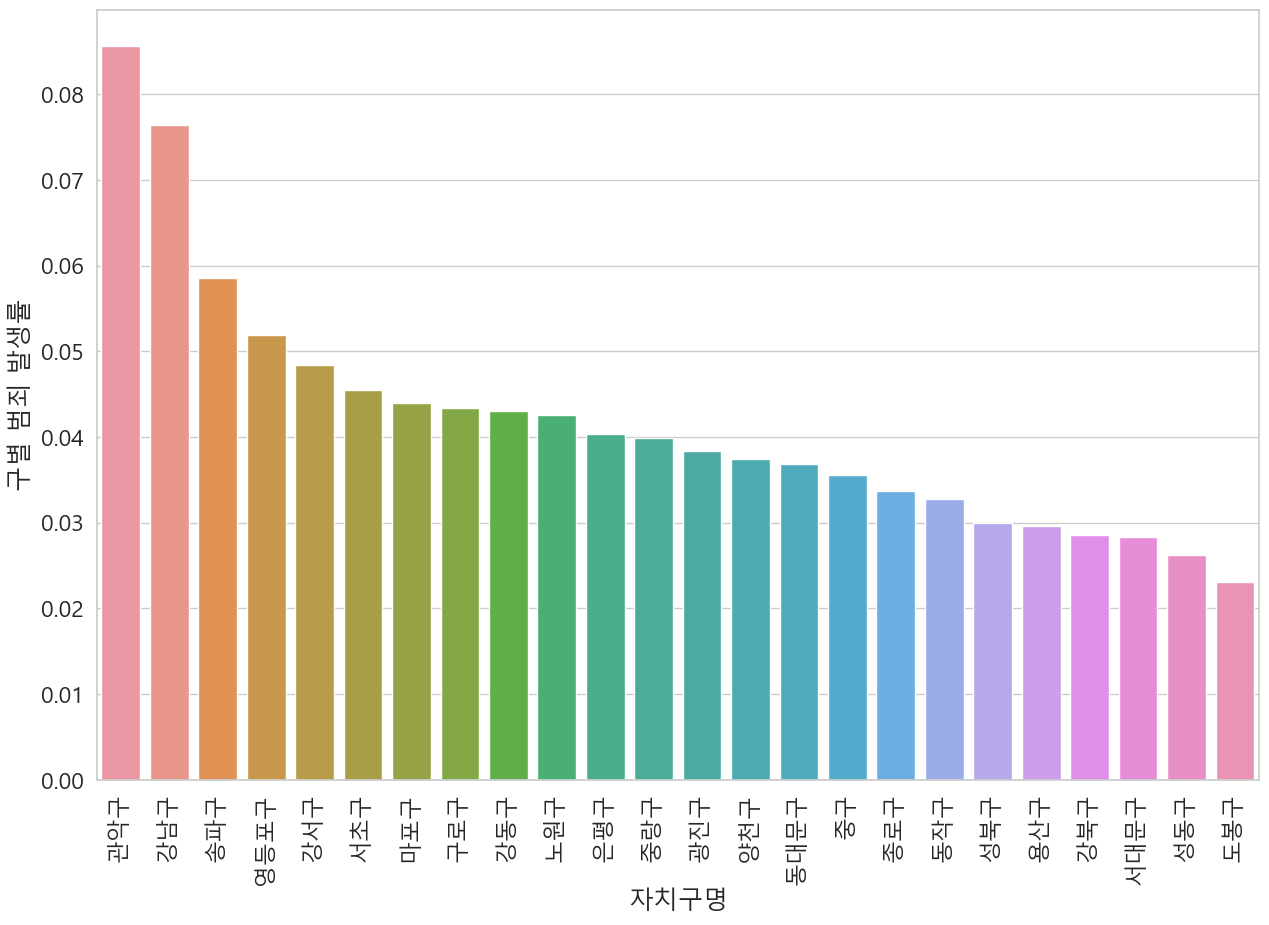

In [47]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90) 
sns.barplot(x='자치구명', y='구별 범죄 발생률', data=pivot_crime);

# Crime, sel_propert 병합

In [ ]:
# merge로 pivot_crime 과 sel_propert를 병합
df = sel_propert.merge(pivot_crime, on = '자치구명', how = 'inner')
df

,접수년도,자치구코드,자치구명,법정동코드,법정동명,계약일,전월세구분,임대면적,임대면적(평수),보증금(만원),...,계약년도,계약분기,강간,"강간,추행",강도,살인,절도,폭력,행 합계,구별 범죄 발생률
0,2022,11560,영등포구,1156012600,양평동2가,2022-01-01,전세,18.84,5.69평,16000,...,2022,1,0,279,11,8,1712,2169,4179,0.051949
1,2022,11560,영등포구,1156011800,도림동,2022-01-01,월세,20.00,6.04평,300,...,2022,1,0,279,11,8,1712,2169,4179,0.051949
2,2022,11560,영등포구,1156012700,양평동3가,2022-01-01,월세,14.00,4.23평,500,...,2022,1,0,279,11,8,1712,2169,4179,0.051949
3,2022,11560,영등포구,1156011100,당산동1가,2022-01-01,전세,16.50,4.98평,6000,...,2022,1,0,279,11,8,1712,2169,4179,0.051949
4,2022,11560,영등포구,1156011800,도림동,2022-01-01,월세,33.00,9.97평,2000,...,2022,1,0,279,11,8,1712,2169,4179,0.051949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211030,2023,11320,도봉구,1132010500,쌍문동,2022-12-30,월세,23.00,6.95평,500,...,2022,4,72,0,2,2,772,1012,1860,0.023121
211031,2023,11320,도봉구,1132010600,방학동,2022-12-30,월세,17.86,5.4평,1000,...,2022,4,72,0,2,2,772,1012,1860,0.023121
211032,2022,11320,도봉구,1132010500,쌍문동,2022-12-30,월세,19.80,5.98평,500,...,2022,4,72,0,2,2,772,1012,1860,0.023121
211033,2023,11320,도봉구,1132010600,방학동,2022-12-31,전세,30.76,9.29평,3500,...,2022,4,72,0,2,2,772,1012,1860,0.023121


# 지하철 정보 데이터

In [ ]:
subway = pd.read_csv('data/서울시 지하철역 연계 지하도 공간정보.csv', encoding='euc-kr')
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6563 entries, 0 to 6562
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   노드링크 유형   6563 non-null   object 
 1   노드 WKT    3491 non-null   object 
 2   노드 ID     6563 non-null   int64  
 3   노드 유형 코드  3491 non-null   float64
 4   링크 WKT    3072 non-null   object 
 5   링크 ID     6563 non-null   int64  
 6   링크 유형 코드  3072 non-null   float64
 7   시작노드 ID   3072 non-null   float64
 8   종료노드 ID   3072 non-null   float64
 9   링크 길이     3072 non-null   float64
 10  시군구코드     6563 non-null   int64  
 11  시군구명      6563 non-null   object 
 12  읍면동코드     6563 non-null   int64  
 13  읍면동명      6563 non-null   object 
 14  지하철역코드    6563 non-null   int64  
 15  지하철역명     6563 non-null   object 
 16  리프트       6563 non-null   int64  
 17  엘리베이터     6563 non-null   int64  
dtypes: float64(5), int64(7), object(6)
memory usage: 923.0+ KB


In [ ]:
subway.head()

,노드링크 유형,노드 WKT,노드 ID,노드 유형 코드,링크 WKT,링크 ID,링크 유형 코드,시작노드 ID,종료노드 ID,링크 길이,시군구코드,시군구명,읍면동코드,읍면동명,지하철역코드,지하철역명,리프트,엘리베이터
0,NODE,POINT(127.01550585346979 37.573234568417995),159685,1.0,NaN,0,NaN,NaN,NaN,NaN,1111000000,종로구,1111017400,창신동,268,동묘앞,1,0
1,NODE,POINT(127.01619593666405 37.57330084304634),159705,1.0,NaN,0,NaN,NaN,NaN,NaN,1111000000,종로구,1111017500,숭인동,268,동묘앞,1,0
2,NODE,POINT(127.01602335654462 37.57300793512578),159707,1.0,NaN,0,NaN,NaN,NaN,NaN,1111000000,종로구,1111017500,숭인동,268,동묘앞,1,0
3,NODE,POINT(127.01177062630677 37.571776063729565),154034,1.0,NaN,0,NaN,NaN,NaN,NaN,1111000000,종로구,1111017400,창신동,272,동대문,0,0
4,NODE,POINT(127.01546995294608 37.579924238231975),167346,1.0,NaN,0,NaN,NaN,NaN,NaN,1111000000,종로구,1111017500,숭인동,270,창신,1,0


In [ ]:
delete = ['노드링크 유형', '노드 WKT', '노드 ID', '노드 유형 코드', '링크 WKT', '링크 ID', '링크 유형 코드', '시작노드 ID', '종료노드 ID', '링크 길이', '리프트', '엘리베이터']
subway = subway.drop(columns=delete)
subway.head()

,시군구코드,시군구명,읍면동코드,읍면동명,지하철역코드,지하철역명
0,1111000000,종로구,1111017400,창신동,268,동묘앞
1,1111000000,종로구,1111017500,숭인동,268,동묘앞
2,1111000000,종로구,1111017500,숭인동,268,동묘앞
3,1111000000,종로구,1111017400,창신동,272,동대문
4,1111000000,종로구,1111017500,숭인동,270,창신


In [ ]:
subway = subway.drop_duplicates()
print(subway)

subway.isnull().sum()
subway.head()

           시군구코드 시군구명       읍면동코드 읍면동명  지하철역코드          지하철역명
0     1111000000  종로구  1111017400  창신동     268            동묘앞
1     1111000000  종로구  1111017500  숭인동     268            동묘앞
3     1111000000  종로구  1111017400  창신동     272            동대문
4     1111000000  종로구  1111017500  숭인동     270             창신
6     1111000000  종로구  1111017400  창신동     270             창신
...          ...  ...         ...  ...     ...            ...
6359  1174000000  강동구  1174010600  둔촌동      35            둔촌동
6372  1174000000  강동구  1174010300  상일동      31             강일
6375  1174000000  강동구  1174010900  천호동      30             강동
6387  1174000000  강동구  1174010900  천호동      32  굽은다리(강동구민회관앞)
6395  1174000000  강동구  1174010600  둔촌동      37           둔촌오륜

[537 rows x 6 columns]


,시군구코드,시군구명,읍면동코드,읍면동명,지하철역코드,지하철역명
0,1111000000,종로구,1111017400,창신동,268,동묘앞
1,1111000000,종로구,1111017500,숭인동,268,동묘앞
3,1111000000,종로구,1111017400,창신동,272,동대문
4,1111000000,종로구,1111017500,숭인동,270,창신
6,1111000000,종로구,1111017400,창신동,270,창신


In [ ]:
# 읍면동 코드 > 법정동 코드, 읍명동명 > 법정동명 
subway.rename(columns={'읍면동코드': '법정동코드'}, inplace=True)
subway.rename(columns={'읍면동명': '법정동명'}, inplace=True)

#'00역' 표기
subway['지하철역명'] = subway['지하철역명'].apply(lambda x: x + '역')

subway.head()



,시군구코드,시군구명,법정동코드,법정동명,지하철역코드,지하철역명
0,1111000000,종로구,1111017400,창신동,268,동묘앞역
1,1111000000,종로구,1111017500,숭인동,268,동묘앞역
3,1111000000,종로구,1111017400,창신동,272,동대문역
4,1111000000,종로구,1111017500,숭인동,270,창신역
6,1111000000,종로구,1111017400,창신동,270,창신역


In [ ]:
#00동에 따른 지하철역 수와 해당되는 지하철역명 이름
grouped = subway.groupby(['법정동명', '법정동코드'])['지하철역명'].agg(['count', ', '.join]).reset_index()
grouped.columns = ['법정동명', '법정동코드', '지하철역수', '지하철역명']
grouped.head()

,법정동명,법정동코드,지하철역수,지하철역명
0,가락동,1171010700,5,"가락시장역, 송파역, 경찰병원역, 오금역, 개롱역"
1,가리봉동,1153010300,1,남구로역
2,가산동,1154510100,3,"가산디지털단지역, 독산역, 금천구청역"
3,가양동,1150010400,3,"증미역, 양천향교역, 가양역"
4,갈월동,1117010400,2,"숙대입구(갈월)역, 남영역"


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
grouped

,법정동명,법정동코드,지하철역수,지하철역명
0,가락동,1171010700,5,"가락시장역, 송파역, 경찰병원역, 오금역, 개롱역"
1,가리봉동,1153010300,1,남구로역
2,가산동,1154510100,3,"가산디지털단지역, 독산역, 금천구청역"
3,가양동,1150010400,3,"증미역, 양천향교역, 가양역"
4,갈월동,1117010400,2,"숙대입구(갈월)역, 남영역"
5,갈현동,1138010400,2,"연신내역, 구산역"
6,강일동,1174011000,1,강일역
7,개봉동,1153010700,1,개봉역
8,개포동,1168010300,4,"개포동역, 구룡역, 대모산입구역, 대청역"
9,개화동,1150011000,1,개화역


# crime과 sel_propert merge한 데이터와 subway 데이터 병합

In [ ]:
df = df.merge(grouped, on = '법정동코드', how = 'inner')
df

In [ ]:
df.head()